# Election Results and Demographics Analysis

### 1. Introduction
### 2. Data Cleansing and exploration
### 3. Data Visualization
### 4. Data Analysis

## 1. Introduction
 This analysis is about 2018 elections held in the US. There are two datasets considered in the analysis, election results for county and county-wise demographics data that describe the poverty levels, age, education levels etc,. in the county.
 
First, we find out how many of these attributes co-related with counties either voting Democratic or Republican. Then using the co-related attributes we can build regression and classification models to predict the number of votes each party gets also what party the county votes for.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import geopandas
import shapefile
%matplotlib inline

## 2. Data Cleansing and Exploration

In [2]:
data = pd.read_csv('election_train.csv')
data.head()

,Year,State,County,Office,Party,Votes
0,2018,AZ,Apache County,US Senator,Democratic,16298.0
1,2018,AZ,Apache County,US Senator,Republican,7810.0
2,2018,AZ,Cochise County,US Senator,Democratic,17383.0
3,2018,AZ,Cochise County,US Senator,Republican,26929.0
4,2018,AZ,Coconino County,US Senator,Democratic,34240.0


In [3]:
# Here the 'Party' column is pivoted to change to give two new columns - 'Democratic' and 'Republican'
data_tidy = pd.pivot_table(data = data,values='Votes',columns='Party',index=['State','County','Year','Office'],\
                           aggfunc=np.sum).reset_index()
data_tidy['County'] = data_tidy['County'].apply(lambda x : x.replace(' County','')) # Whitespace removed
data_tidy.head()

Party,State,County,Year,Office,Democratic,Republican
0,AZ,Apache,2018,US Senator,16298.0,7810.0
1,AZ,Cochise,2018,US Senator,17383.0,26929.0
2,AZ,Coconino,2018,US Senator,34240.0,19249.0
3,AZ,Gila,2018,US Senator,7643.0,12180.0
4,AZ,Graham,2018,US Senator,3368.0,6870.0


In [8]:
demo = pd.read_csv('demographics_train.csv')
demo.head()
# Demographics data is explored and cleaned

,State,County,FIPS,Total Population,Citizen Voting-Age Population,"Percent White, not Hispanic or Latino","Percent Black, not Hispanic or Latino",Percent Hispanic or Latino,Percent Foreign Born,Percent Female,Percent Age 29 and Under,Percent Age 65 and Older,Median Household Income,Percent Unemployed,Percent Less than High School Degree,Percent Less than Bachelor's Degree,Percent Rural
0,Wisconsin,La Crosse,55063,117538,0,90.537528,1.214075,1.724549,2.976059,51.171536,43.241335,14.702479,51477,4.796952,5.474767,67.529757,16.827753
1,Virginia,Alleghany,51005,15919,12705,91.940449,5.207614,1.432251,1.300333,51.077329,31.660280,23.902255,45538,4.560986,15.537543,83.711604,52.393846
2,Indiana,Fountain,18045,16741,12750,95.705155,0.400215,2.359477,1.547100,49.770026,35.899887,18.941521,45924,7.978789,12.032155,85.538940,65.951276
3,Ohio,Geauga,39055,94020,0,95.837056,1.256116,1.294405,2.578175,50.678579,36.281642,18.028079,74165,4.036902,8.928599,62.730824,63.968990
4,Wisconsin,Jackson,55053,20566,15835,86.662453,1.983857,3.082758,1.376058,46.649810,36.292911,17.587280,49608,5.569698,11.792912,86.129256,72.238251


In [9]:
demo.nunique()

State                                      30
County                                    890
FIPS                                     1216
Total Population                         1206
Citizen Voting-Age Population             520
Percent White, not Hispanic or Latino    1216
Percent Black, not Hispanic or Latino    1171
Percent Hispanic or Latino               1212
Percent Foreign Born                     1213
Percent Female                           1215
Percent Age 29 and Under                 1216
Percent Age 65 and Older                 1216
Median Household Income                  1196
Percent Unemployed                       1211
Percent Less than High School Degree     1216
Percent Less than Bachelor's Degree      1216
Percent Rural                             958
dtype: int64

In [10]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Palau': 'PW',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

In [11]:
demo['State'] = demo['State'].map(us_state_abbrev)
demo['County'] = demo['County'].str.lower()
data_tidy['County'] = data_tidy['County'].str.lower()

### We merge the demographics and election results data

In [12]:
merged_data = pd.merge(data_tidy,demo)
merged_data.head()

,State,County,Year,Office,Democratic,Republican,FIPS,Total Population,Citizen Voting-Age Population,"Percent White, not Hispanic or Latino",...,Percent Hispanic or Latino,Percent Foreign Born,Percent Female,Percent Age 29 and Under,Percent Age 65 and Older,Median Household Income,Percent Unemployed,Percent Less than High School Degree,Percent Less than Bachelor's Degree,Percent Rural
0,AZ,apache,2018,US Senator,16298.0,7810.0,4001,72346,0,18.571863,...,5.947806,1.719515,50.598513,45.854643,13.322091,32460,15.807433,21.758252,88.941063,74.061076
1,AZ,cochise,2018,US Senator,17383.0,26929.0,4003,128177,92915,56.299492,...,34.403208,11.458374,49.069646,37.902276,19.756275,45383,8.567108,13.409171,76.837055,36.301067
2,AZ,coconino,2018,US Senator,34240.0,19249.0,4005,138064,104265,54.619597,...,13.711033,4.825298,50.581614,48.946141,10.873943,51106,8.238305,11.085381,65.791439,31.466066
3,AZ,gila,2018,US Senator,7643.0,12180.0,4007,53179,0,63.222325,...,18.548675,4.249798,50.296170,32.238290,26.397638,40593,12.129932,15.729958,82.262624,41.062000
4,AZ,graham,2018,US Senator,3368.0,6870.0,4009,37529,0,51.461536,...,32.097844,4.385942,46.313518,46.393456,12.315809,47422,14.424104,14.580797,86.675944,46.437399


In [13]:
merged_data = merged_data.drop(columns=['Year','Office'])
# we drop these columns as they are kind of obvious

In [14]:
merged_data[merged_data['Democratic'] == 0]

,State,County,Democratic,Republican,FIPS,Total Population,Citizen Voting-Age Population,"Percent White, not Hispanic or Latino","Percent Black, not Hispanic or Latino",Percent Hispanic or Latino,Percent Foreign Born,Percent Female,Percent Age 29 and Under,Percent Age 65 and Older,Median Household Income,Percent Unemployed,Percent Less than High School Degree,Percent Less than Bachelor's Degree,Percent Rural
425,NE,lancaster,0.0,0.0,31109,301707,0,82.659667,3.783472,6.531834,7.523856,49.891782,45.457016,12.175057,53730,4.372984,6.636272,62.697684,8.253126
714,TN,meigs,0.0,0.0,47121,11804,0,94.713656,1.330058,1.465605,1.067435,50.626906,33.361572,19.662826,35209,12.544170,21.141176,91.176471,100.000000
750,TX,bee,0.0,0.0,48025,32706,0,32.660674,7.989360,57.909864,4.344769,39.579894,40.448236,11.514707,44005,6.065048,28.602944,91.094503,42.977308
865,TX,menard,0.0,0.0,48327,2163,0,56.310680,1.248266,39.389736,4.299584,46.833102,36.430883,22.468793,37917,8.360836,21.113990,84.909326,100.000000
1114,WI,lafayette,0.0,0.0,55065,16793,0,94.771631,0.339427,3.507414,2.286667,49.199071,37.688323,16.709343,53038,2.998885,10.123457,82.336861,100.000000


In [15]:
# Dropped these rows as they have zero as number of voters 

In [16]:
merged_data = merged_data[merged_data['Democratic']!=0]

In [17]:
# The following code drops the 'Citizen Voting-Age Population' column. Since it's irrelevant to the data.

In [18]:
merged_data = merged_data.drop('Citizen Voting-Age Population',axis=1)

### Creating a new column to determine what party the county voted for

In [19]:
def party(votes):
    if votes['Democratic'] > votes['Republican']:
        return 1
    else:
        return 0

In [20]:
merged_data['Party'] = merged_data.apply(party,axis=1)

In [21]:
merged_data[['Democratic','Republican','Party']].head()

,Democratic,Republican,Party
0,16298.0,7810.0,1
1,17383.0,26929.0,0
2,34240.0,19249.0,1
3,7643.0,12180.0,0
4,3368.0,6870.0,0


In [22]:
# Democratic Counties
a = merged_data[merged_data['Party']==1]['Total Population']
# Republican Counties
b = merged_data[merged_data['Party']==0]['Total Population']

# The following is the hypothesis test

### Hypothesis testing to check whether the mean population of democratic countries is higher

In [23]:
[statistic, pvalue] = st.ttest_ind(a, b, equal_var = False)
print(statistic)
print(pvalue/2)

8.004638577960957
1.0239358801486512e-14


In [24]:
# We set a threshold level of 5 percent. It's a two tailed statistic, hence we divide p-value by 2.
1.0239358801486512e-14 < 0.05

True

### Since the p-value is less than 0.05, we reject the null hypothesis and the difference is statistically significant. We can conclude that the alternative hypothesis provides a much better explanantion and mean population of democratic counties is higher than the republican counties.

### Hypothesis testing to check whether Median income is substantialy different for counties that vote differernt party.

In [25]:
# This is the mean Median-Household Income value for the Democratic counties
merged_data[merged_data['Party']== 1]['Median Household Income'].mean()

53798.732307692306

In [26]:
# This is the mean Median-Household Income value for the Republican counties
merged_data[merged_data['Party']== 0]['Median Household Income'].mean()

48746.81954022989

In [27]:
# Democratic Counties
c = merged_data[merged_data['Party']== 1]['Median Household Income']
# Republican Counties
d = merged_data[merged_data['Party']== 0]['Median Household Income']

In [28]:
[statistic, pvalue] = st.ttest_ind(c, d, equal_var = False)
print(statistic)
print(pvalue/2)

5.479141589767387
3.574718681591286e-08


In [29]:
3.574718681591286e-08 < 0.05

True

### Since the p-value is less than 0.05, we reject the null hypothesis and the difference is statistically significant. We can conclude that the alternative hypothesis provides a much better explanantion and mean Median-Household Income of Democratic counties is higher than the Republican counties.

## We create a new Column for demographics Age 30 to 64.

In [30]:
merged_data['Percent Age 30 to 64'] = 100 - merged_data['Percent Age 29 and Under'] - merged_data['Percent Age 65 and Older']
merged_data.head()

,State,County,Democratic,Republican,FIPS,Total Population,"Percent White, not Hispanic or Latino","Percent Black, not Hispanic or Latino",Percent Hispanic or Latino,Percent Foreign Born,Percent Female,Percent Age 29 and Under,Percent Age 65 and Older,Median Household Income,Percent Unemployed,Percent Less than High School Degree,Percent Less than Bachelor's Degree,Percent Rural,Party,Percent Age 30 to 64
0,AZ,apache,16298.0,7810.0,4001,72346,18.571863,0.486551,5.947806,1.719515,50.598513,45.854643,13.322091,32460,15.807433,21.758252,88.941063,74.061076,1,40.823266
1,AZ,cochise,17383.0,26929.0,4003,128177,56.299492,3.714395,34.403208,11.458374,49.069646,37.902276,19.756275,45383,8.567108,13.409171,76.837055,36.301067,0,42.341450
2,AZ,coconino,34240.0,19249.0,4005,138064,54.619597,1.342855,13.711033,4.825298,50.581614,48.946141,10.873943,51106,8.238305,11.085381,65.791439,31.466066,1,40.179917
3,AZ,gila,7643.0,12180.0,4007,53179,63.222325,0.552850,18.548675,4.249798,50.296170,32.238290,26.397638,40593,12.129932,15.729958,82.262624,41.062000,0,41.364072
4,AZ,graham,3368.0,6870.0,4009,37529,51.461536,1.811932,32.097844,4.385942,46.313518,46.393456,12.315809,47422,14.424104,14.580797,86.675944,46.437399,0,41.290735


## Exploration of Age attribute

In [31]:
# 1 is Democratic. 0 is Republican
# Democratic - 29 and under
merged_data[merged_data['Party'] == 1]['Percent Age 29 and Under'].describe()

count    325.000000
mean      38.726959
std        6.252786
min       23.156452
25%       34.488444
50%       38.074151
75%       42.161162
max       67.367823
Name: Percent Age 29 and Under, dtype: float64

In [32]:
# Republican 29 and under
merged_data[merged_data['Party'] == 0]['Percent Age 29 and Under'].describe()

count    870.000000
mean      36.005719
std        5.181522
min       11.842105
25%       32.983652
50%       35.846532
75%       38.539787
max       58.749116
Name: Percent Age 29 and Under, dtype: float64

In [33]:
# Democratic  Age 30 - 64
merged_data[merged_data['Party'] == 1]['Percent Age 30 to 64'].describe()

count    325.000000
mean      45.078214
std        3.907598
min       18.433769
25%       43.741937
50%       45.817819
75%       47.448269
max       57.478906
Name: Percent Age 30 to 64, dtype: float64

In [34]:
# Republican Age 30 - 64
merged_data[merged_data['Party'] == 0]['Percent Age 30 to 64'].describe()

count    870.000000
mean      45.166015
std        2.910264
min       27.421759
25%       43.522522
50%       45.553295
75%       46.975771
max       63.157895
Name: Percent Age 30 to 64, dtype: float64

In [35]:
# Democratic Age 65+
merged_data[merged_data['Party'] == 1]['Percent Age 65 and Older'].describe()

count    325.000000
mean      16.194826
std        4.282422
min        6.653188
25%       13.106233
50%       15.698087
75%       18.806426
max       31.642106
Name: Percent Age 65 and Older, dtype: float64

In [36]:
# Republican Age 65+
merged_data[merged_data['Party'] == 0]['Percent Age 65 and Older'].describe()

count    870.000000
mean      18.828267
std        4.733155
min        6.954387
25%       15.784982
50%       18.377896
75%       21.112847
max       37.622759
Name: Percent Age 65 and Older, dtype: float64

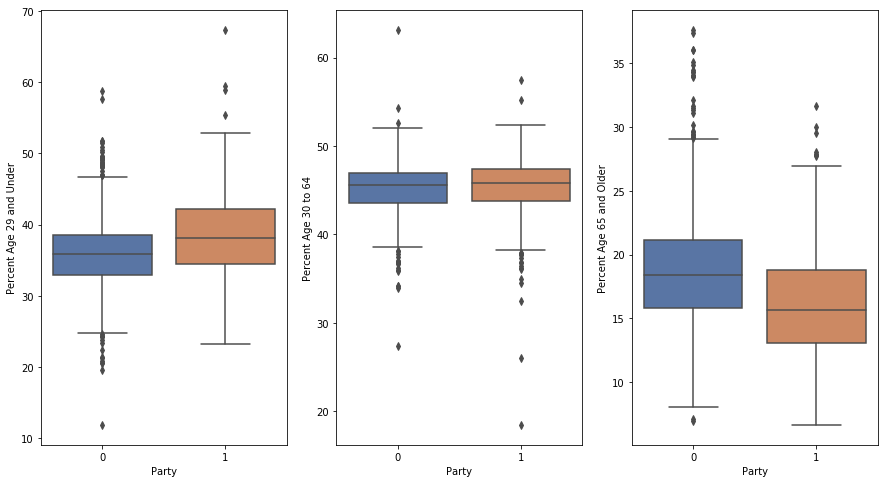

In [37]:
fig,ax = plt.subplots(1,3,figsize=(15,8))
sns.set()
sns.boxplot(x = 'Party', y= 'Percent Age 29 and Under' , data = merged_data,ax=ax[0])
sns.boxplot(x = 'Party', y= 'Percent Age 30 to 64' , data = merged_data,ax=ax[1])
sns.boxplot(x = 'Party', y= 'Percent Age 65 and Older' , data = merged_data,ax=ax[2])

### In the above plots '1' corresponds to Democratic and '0' corresponds to Republic. From exploring data and the visualisation we can conclude that counties that are younger tend to vote for Democratic and older ones vote for Republic

## Exploration of Gender attribute

In [38]:
#Democratic
merged_data[merged_data['Party'] == 1]['Percent Female'].describe()

count    325.000000
mean      50.385433
std        2.149359
min       34.245291
25%       49.854280
50%       50.653830
75%       51.492075
max       56.418468
Name: Percent Female, dtype: float64

In [39]:
#Republican
merged_data[merged_data['Party'] == 0]['Percent Female'].describe()

count    870.000000
mean      49.630898
std        2.429013
min       21.513413
25%       49.222905
50%       50.176792
75%       50.829770
max       55.885023
Name: Percent Female, dtype: float64

In [40]:
# Male data 
merged_data['Percent male'] = 100 - merged_data['Percent Female']

In [41]:
#Democratic
merged_data[merged_data['Party'] == 1]['Percent male'].describe()

count    325.000000
mean      49.614567
std        2.149359
min       43.581532
25%       48.507925
50%       49.346170
75%       50.145720
max       65.754709
Name: Percent male, dtype: float64

In [42]:
#Republican
merged_data[merged_data['Party'] == 0]['Percent male'].describe()

count    870.000000
mean      50.369102
std        2.429013
min       44.114977
25%       49.170230
50%       49.823208
75%       50.777095
max       78.486587
Name: Percent male, dtype: float64

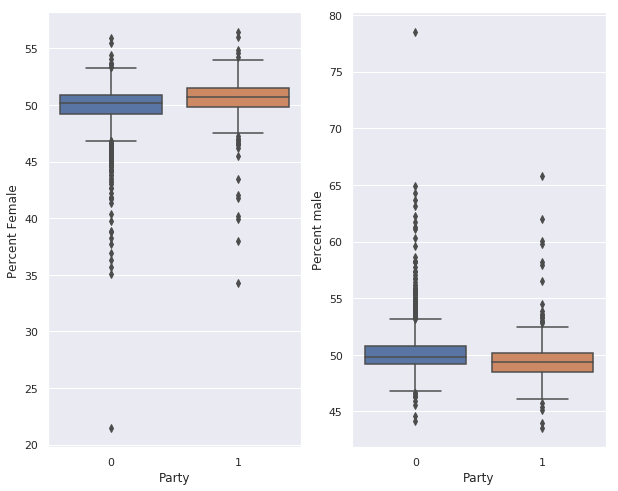

In [43]:
fig,ax = plt.subplots(1,2,figsize=(10,8))
sns.set()
sns.boxplot(x = 'Party', y= 'Percent Female' , data = merged_data,ax=ax[0])
sns.boxplot(x = 'Party', y= 'Percent male' , data = merged_data,ax=ax[1])

### From the data we can conclude that gender doesn't affect in a county voting either party.

## Exploration of Race attribute

In [44]:
#Democratic
merged_data[merged_data['Party'] == 1]['Percent White, not Hispanic or Latino'].describe()

count    325.000000
mean      69.683766
std       24.981502
min        2.776702
25%       53.271579
50%       77.786090
75%       90.300749
max       98.063495
Name: Percent White, not Hispanic or Latino, dtype: float64

In [45]:
#Republican
merged_data[merged_data['Party'] == 0]['Percent White, not Hispanic or Latino'].describe()

count    870.000000
mean      82.656646
std       16.056122
min       18.758977
25%       75.016397
50%       89.434849
75%       94.466596
max       99.627329
Name: Percent White, not Hispanic or Latino, dtype: float64

In [46]:
#Democratic
merged_data[merged_data['Party'] == 1]['Percent Black, not Hispanic or Latino'].describe()

count    325.000000
mean       9.242649
std       13.351340
min        0.000000
25%        0.839103
50%        3.485992
75%       11.058843
max       63.953279
Name: Percent Black, not Hispanic or Latino, dtype: float64

In [47]:
#Republican
merged_data[merged_data['Party'] == 0]['Percent Black, not Hispanic or Latino'].describe()

count    870.000000
mean       4.189241
std        6.721695
min        0.000000
25%        0.460419
50%        1.318311
75%        4.753831
max       41.563041
Name: Percent Black, not Hispanic or Latino, dtype: float64

In [48]:
#Democratic
merged_data[merged_data['Party'] == 1]['Percent Hispanic or Latino'].describe()

count    325.000000
mean      12.587391
std       19.575030
min        0.193349
25%        2.531017
50%        5.039747
75%       11.857116
max       95.479801
Name: Percent Hispanic or Latino, dtype: float64

In [49]:
#Republican
merged_data[merged_data['Party'] == 0]['Percent Hispanic or Latino'].describe()

count    870.000000
mean       9.733094
std       14.049576
min        0.000000
25%        1.704539
50%        3.427435
75%       10.709696
max       78.397012
Name: Percent Hispanic or Latino, dtype: float64

In [50]:
#OTHER RACES
merged_data['Percent Other Race'] =  100 -(merged_data['Percent White, not Hispanic or Latino'] + merged_data['Percent Black, not Hispanic or Latino'] + merged_data['Percent Hispanic or Latino'])

In [51]:
#Democratic
merged_data[merged_data['Party'] == 1]['Percent Other Race'].describe()

count    3.250000e+02
mean     8.486194e+00
std      1.317655e+01
min      1.999993e-09
25%      2.844924e+00
50%      4.954669e+00
75%      7.634006e+00
max      8.490016e+01
Name: Percent Other Race, dtype: float64

In [52]:
#Republican
merged_data[merged_data['Party'] == 0]['Percent Other Race'].describe()

count    870.000000
mean       3.421018
std        3.873292
min        0.000000
25%        1.758534
50%        2.482868
75%        3.632770
max       49.407979
Name: Percent Other Race, dtype: float64

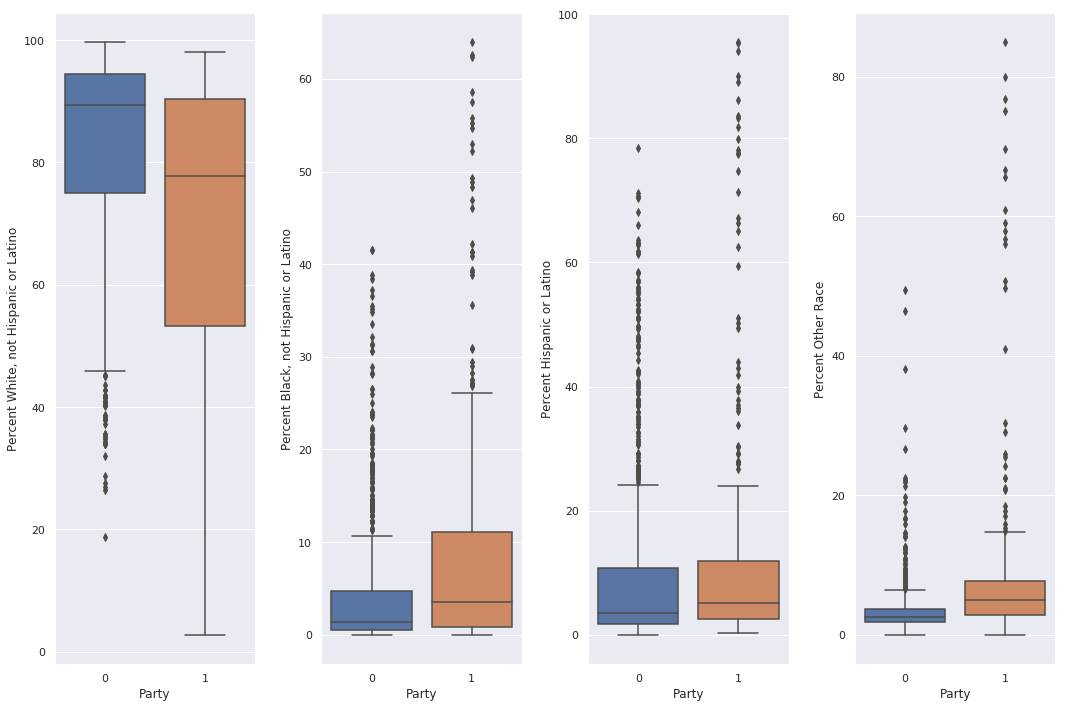

In [53]:
fig,ax = plt.subplots(1,4,figsize=(15,10))
sns.boxplot(x = 'Party', y= 'Percent White, not Hispanic or Latino' , data = merged_data,ax=ax[0])
sns.boxplot(x = 'Party', y= 'Percent Black, not Hispanic or Latino' , data = merged_data,ax=ax[1])
sns.boxplot(x = 'Party', y= 'Percent Hispanic or Latino' , data = merged_data,ax=ax[2])
sns.boxplot(x = 'Party', y= 'Percent Other Race' , data = merged_data,ax=ax[3])
plt.tight_layout()

### From the visualisation we can conclude that 'White, not hispanic, nor latino' is more likely to vite for Republican party

## Ethnicity

In [72]:
#Democratic
merged_data[merged_data['Party'] == 1]['Percent Foreign Born'].describe()

count    325.000000
mean       7.986330
std        8.330740
min        0.179769
25%        2.470508
50%        5.105490
75%       10.144555
max       52.229868
Name: Percent Foreign Born, dtype: float64

In [73]:
#Republican
merged_data[merged_data['Party'] == 0]['Percent Foreign Born'].describe()

count    870.000000
mean       3.990096
std        4.507786
min        0.000000
25%        1.320101
50%        2.326317
75%        5.149429
max       37.058317
Name: Percent Foreign Born, dtype: float64

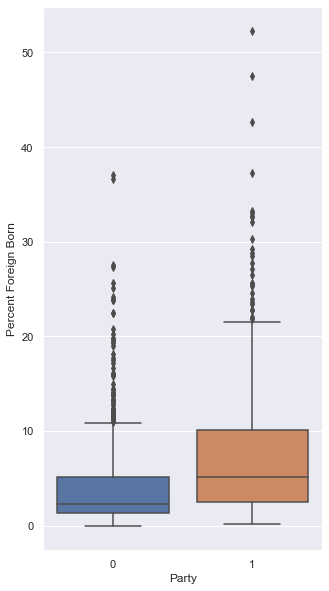

In [74]:
fig,ax = plt.subplots(figsize=(5,10))
sns.boxplot(x = 'Party', y= 'Percent Foreign Born' , data = merged_data)

### From the above plot we can conclude Foreign born are more likely to vote for Democratic party.

## Education

In [75]:
#Democratic
merged_data[merged_data['Party'] == 1]['Percent Less than High School Degree'].describe()

count    325.000000
mean      11.883760
std        6.505613
min        3.215803
25%        7.893714
50%       10.370080
75%       13.637059
max       49.673777
Name: Percent Less than High School Degree, dtype: float64

In [76]:
#Republican
merged_data[merged_data['Party'] == 0]['Percent Less than High School Degree'].describe()

count    870.000000
mean      14.009112
std        6.303126
min        2.134454
25%        9.662491
50%       12.572435
75%       17.447168
max       47.812773
Name: Percent Less than High School Degree, dtype: float64

In [77]:
#Democratic
merged_data[merged_data['Party'] == 1]["Percent Less than Bachelor's Degree"].describe()

count    325.000000
mean      71.968225
std       11.192404
min       26.335440
25%       65.711800
50%       72.736143
75%       79.903653
max       94.849957
Name: Percent Less than Bachelor's Degree, dtype: float64

In [78]:
#Republican
merged_data[merged_data['Party'] == 0]["Percent Less than Bachelor's Degree"].describe()

count    870.000000
mean      81.095427
std        6.815537
min       43.419470
25%       78.108424
50%       82.406700
75%       85.546272
max       97.014925
Name: Percent Less than Bachelor's Degree, dtype: float64

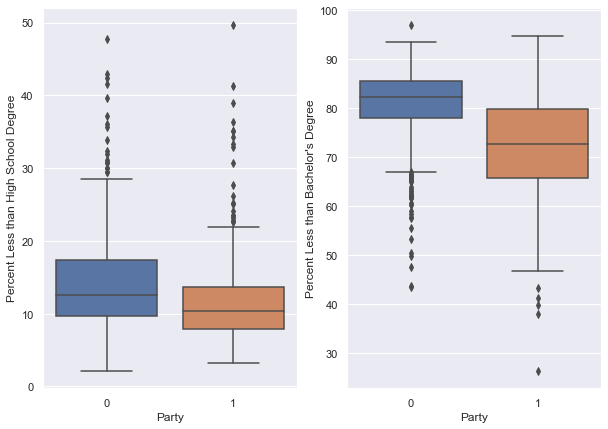

In [91]:
fig,ax = plt.subplots(1,2,figsize=(10,7))

sns.boxplot(x = 'Party', y= 'Percent Less than High School Degree' , data = merged_data,ax=ax[0])
sns.boxplot(x = 'Party', y= "Percent Less than Bachelor's Degree" , data = merged_data,ax=ax[1])


### Below are the plots for 'HighschoolOrHigher' and 'BachelorsOrHigher'

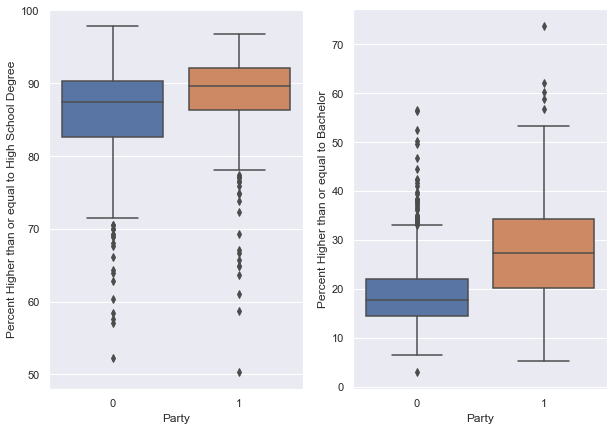

In [93]:
HighschoolOrHigher = pd.concat([merged_data['Percent Less than High School Degree'].map(lambda x:(100-x)).rename('Percent Higher than or equal to High School Degree')\
                                ,merged_data['Party']],axis=1)
BachelorsOrHigher = pd.concat([merged_data["Percent Less than Bachelor's Degree"].map(lambda x:(100-x)).rename('Percent Higher than or equal to Bachelor')\
                               ,merged_data['Party']],axis=1)
fig,ax = plt.subplots(1,2,figsize=(10,7))
sns.boxplot(x = 'Party', y= 'Percent Higher than or equal to High School Degree' , data = HighschoolOrHigher,ax=ax[0])
sns.boxplot(x = 'Party', y= 'Percent Higher than or equal to Bachelor' , data = BachelorsOrHigher,ax=ax[1])


### From this plot we conclude that higher a county has percentage of degree more likely it's to vote Democratic